##### Decision Tree Classification

##### Dataset

Download `banknotes.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the dataset

In [4]:
df = pd.read_csv('datasets/banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


##### Separate the input and output variables

In [7]:
# input data
x = df.drop('Class', axis=1)

# output data
y = df['Class']

In [11]:
x.shape, y.shape

((1372, 4), (1372,))

##### Exploratory Data Analysis

<Axes: xlabel='Class', ylabel='count'>

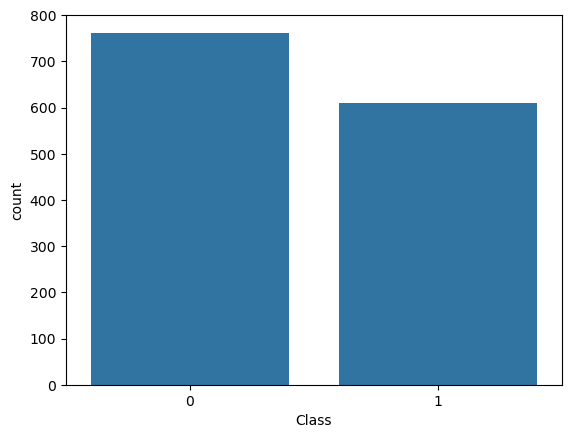

In [15]:
sns.countplot(x = y)

([<matplotlib.patches.Wedge at 0x1fb1b0d1c10>,
 [Text(-0.19046171571266454, 1.0833855891822581, 'Genuine'),
  Text(0.19046171571266443, -1.0833855891822581, 'Fake')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

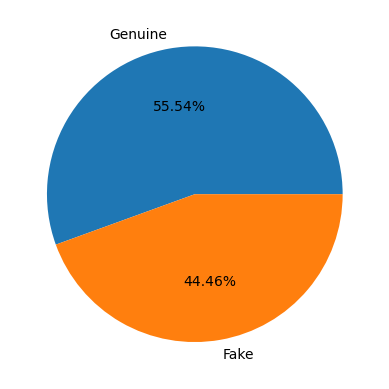

In [14]:
plt.pie(y.value_counts(), labels=['Genuine', 'Fake'], autopct='%2.2f%%')

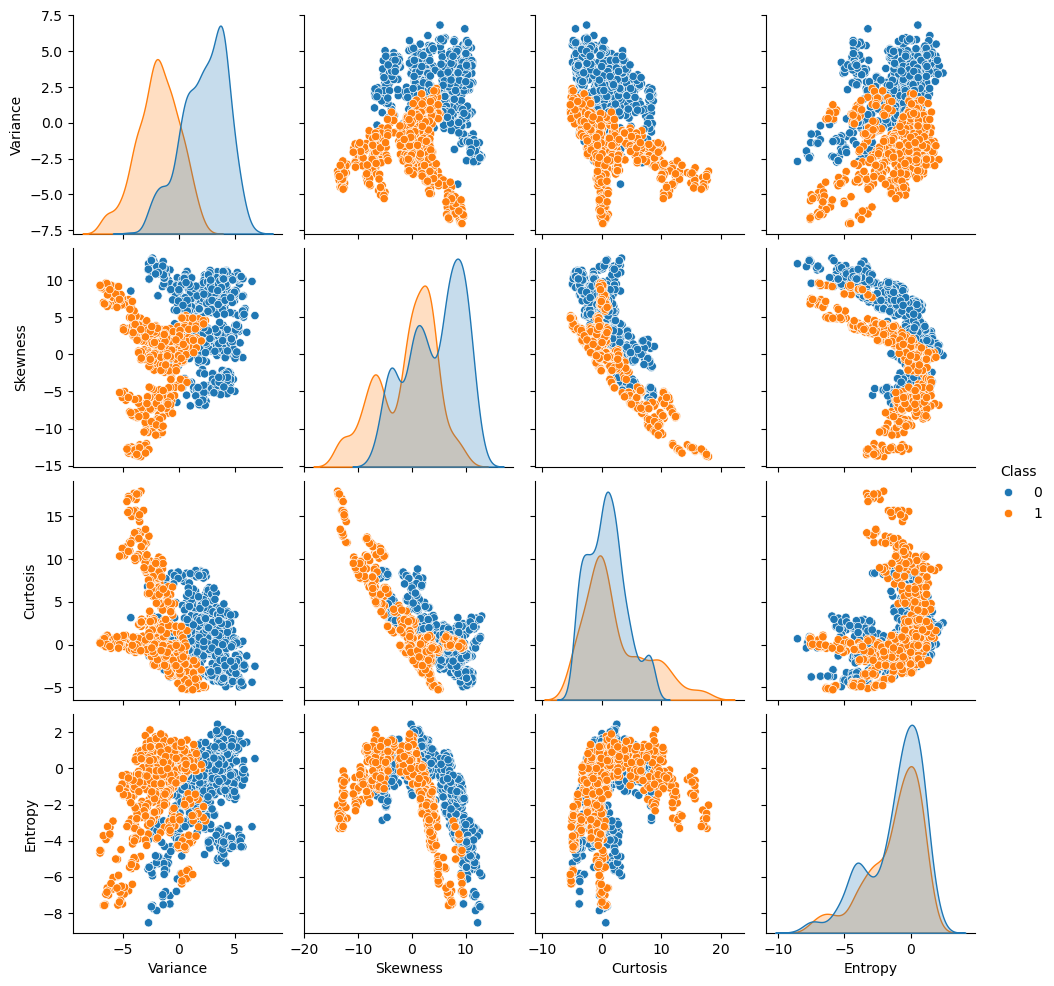

In [16]:
sns.pairplot(df, hue='Class')

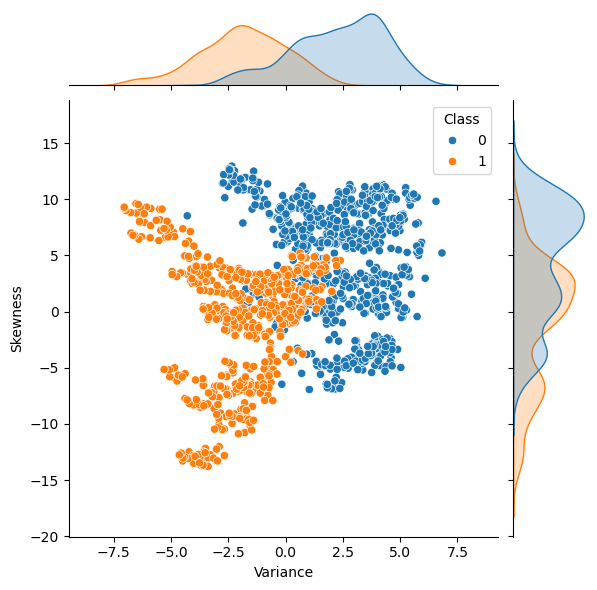

In [17]:
sns.jointplot(data=df, x='Variance', y='Skewness', hue='Class')

##### Cross Validation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

##### Build the tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(random_state=0)

In [23]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

##### Plot the tree

In [25]:
from sklearn.tree import plot_tree

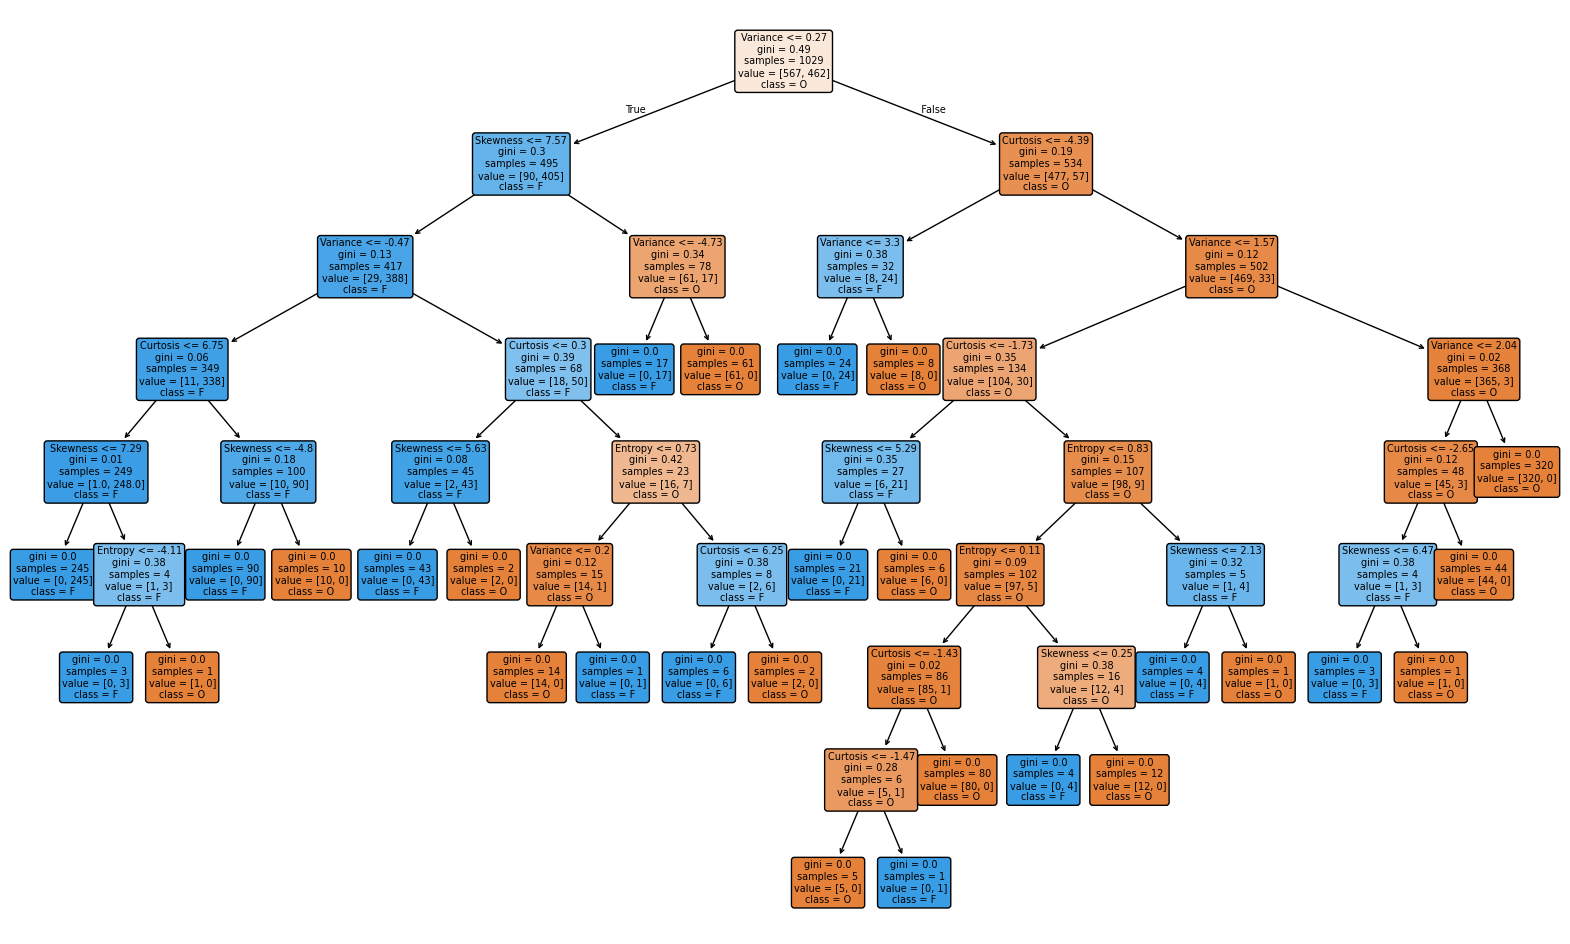

In [33]:
plt.figure(figsize=(20, 12))
plot_tree(tree, fontsize=7, feature_names=x.columns, class_names=['O', 'F'], filled=True, rounded=True, precision=2); 

##### Performance Evaluation

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [35]:
y_pred = tree.predict(x_test)

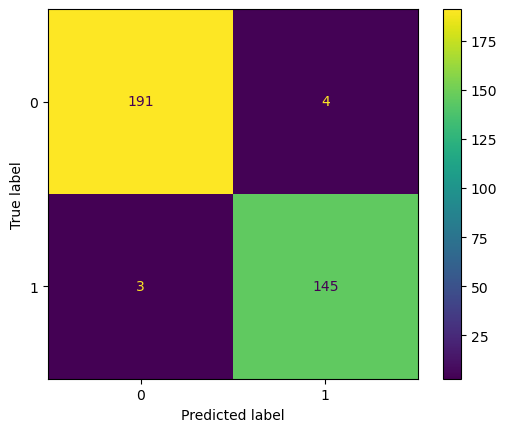

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [41]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [43]:
imp = tree.feature_importances_

<BarContainer object of 4 artists>

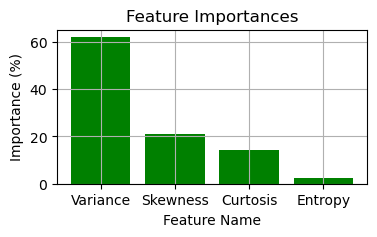

In [51]:
plt.figure(figsize=(4, 2))
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Feature Name')
plt.ylabel('Importance (%)')
plt.bar(x.columns, imp * 100, color='g')

In [56]:
ndf = pd.DataFrame(data=[[0.32924, -4.45520, 4.5718, -0.98880],
                         [-1.38870, -4.87730, 6.4774, 0.34179],
                         [4.54590, 8.16740, -2.4586, -1.46210]], columns=x.columns)
ndf

,Variance,Skewness,Curtosis,Entropy
0,0.32924,-4.4552,4.5718,-0.98880
1,-1.38870,-4.8773,6.4774,0.34179
2,4.54590,8.1674,-2.4586,-1.46210


In [57]:
tree.predict(ndf)

array([0, 1, 0], dtype=int64)